In [4]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import pandas as pd
import pickle
import ast
import json


Carreguem dades

In [5]:
casos_pkl=pd.read_pickle('../casos.pkl')

llibres_pkl = pd.read_pickle('../llibres.pkl')

In [6]:
#obtenim vectors
#vectors = [cas.vector for cas in casos_pkl]
vectors = list(casos_pkl.vector)
vectors_llibres = list(llibres_pkl.vector)

In [8]:
vectors

[array([-1.    , -1.    , -1.    , -1.    , -1.    ,  1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -0.0857, -0.0857, -0.8286,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ,  1.    , -1.    ,  0.2   , -0.2   ,
        -1.    , -1.    , -1.    , -1.    ,  0.0286, -1.    , -0.0286,
        -0.8286,  0.8286,  0.0857, -1.    , -0.0857, -1.    ,  1.    ,
        -0.6571, -1.    ,  0.6571, -0.3143,  0.3143, -1.    ,  0.2783,
        -0.2869]),
 array([-0.9091, -0.9091, -0.9091, -0.9091, -0.9091,  1.    , -0.9091,
        -0.9091, -0.9091, -0.9091, -0.9091, -0.9091, -0.90

### Cluster aglomeratiu

Veiem la distribució de les dades en un cluster aglomeratiu

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


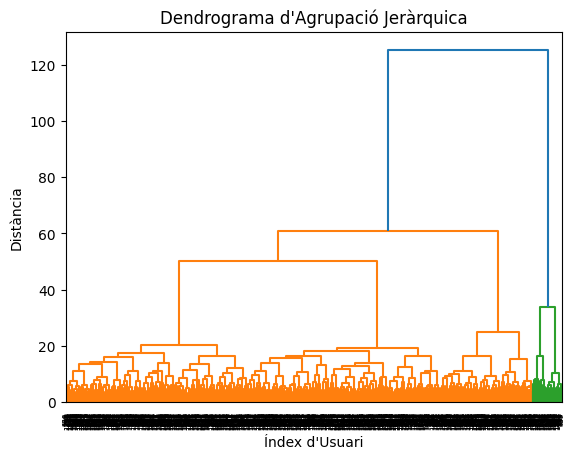

In [9]:
# Calcular la matriu de distàncies
distàncies = pdist(vectors, metric='euclidean')

# Convertir la matriu de distàncies a una matriu quadrada
matriu_distàncies = squareform(distàncies)

# Aplicar l'algoritme d'Agrupació Jeràrquica
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # Trieu el llindar de distància adequat
etiquetes = model.fit_predict(matriu_distàncies)

# Visualitzar el dendrograma
enllaços = linkage(distàncies, method='ward')
dendrogram(enllaços, labels=range(len(vectors)), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma d\'Agrupació Jeràrquica')
plt.xlabel("Índex d'Usuari")
plt.ylabel('Distància')
plt.show()

In [4]:
# Calcular la matriu de distàncies
distàncies_l = pdist(vectors_llibres, metric='euclidean')

# Convertir la matriu de distàncies a una matriu quadrada
matriu_distàncies_l = squareform(distàncies_l)

# Aplicar l'algoritme d'Agrupació Jeràrquica
model_l = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # Trieu el llindar de distància adequat
etiquetes_l = model_l.fit_predict(matriu_distàncies_l)

# Visualitzar el dendrograma
enllaços_l = linkage(distàncies_l, method='ward')

/Users/ucemarc/.pyenv/versions/3.10.4/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


ValueError: Dimensions of Z and labels must be consistent.

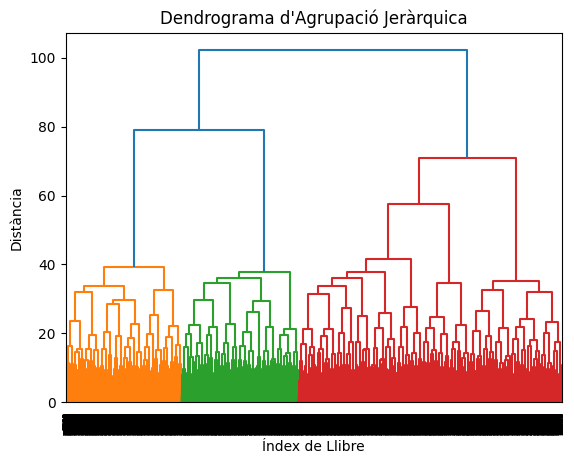

In [6]:
# Visualitzar el dendrograma
dendrogram(enllaços_l, labels=range(len(vectors_llibres)), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma d\'Agrupació Jeràrquica')
plt.xlabel("Índex de Llibre")
plt.ylabel('Distància')
plt.show()

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sk

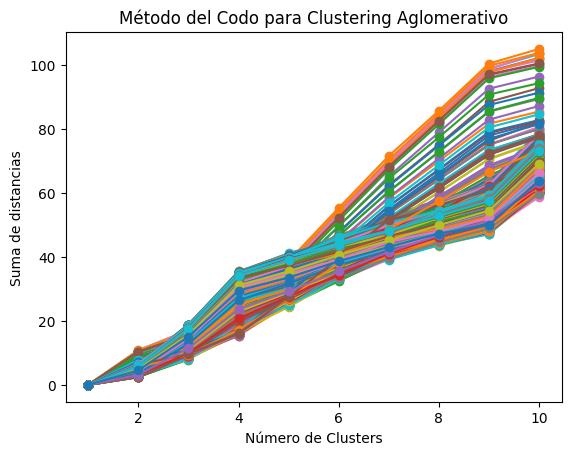

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(vectors, metric='euclidean')

# Método del codo para clustering aglomerativo
wcss = []
for i in range(1, 11):
    model = AgglomerativeClustering(n_clusters=i, affinity='precomputed', linkage='average')
    labels = model.fit_predict(matriu_distàncies)
    wcss.append(sum(np.min(matriu_distàncies[:, labels == j], axis=1) for j in range(i)))

# Graficar la curva del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para Clustering Aglomerativo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de distancias')
plt.show()


In [19]:
#decidim el nombre òptim de clusters
model_clustering = AgglomerativeClustering(n_clusters=4)
clusters = model_clustering.fit_predict(vectors)
#casos['cluster'] = clusters

In [20]:
#guardem el model per predir posteriorment
with open('model_clustering.pkl', 'wb') as archivo:
    pickle.dump(model_clustering, archivo)

### Provem kmeans

Modelo con 1 clusters
Modelo con 2 clusters
Modelo con 3 clusters
Modelo con 4 clusters
Modelo con 5 clusters
Modelo con 6 clusters
Modelo con 7 clusters
Modelo con 8 clusters
Modelo con 9 clusters
Modelo con 10 clusters


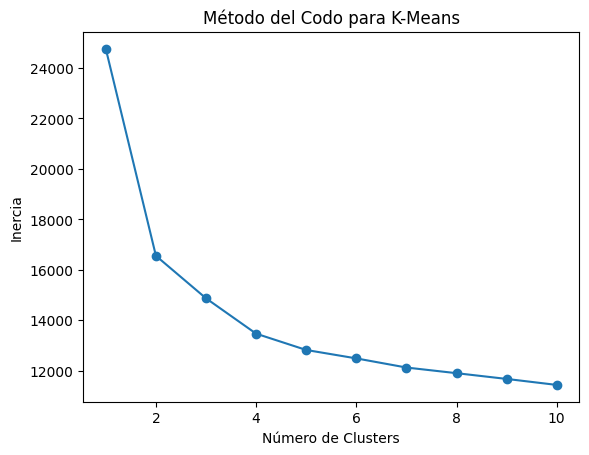

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    print(f"Modelo con {i} clusters")
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(vectors)
    wcss.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [7]:
def calculate_optimal_k(inertia, k_range):
    """
    Calcula el valor óptimo de K utilizando el método del codo automatizado.
    :param inertia: Lista de valores de inercia para diferentes valores de K.
    :param k_range: Rango de valores de K considerados.
    :return: Valor óptimo de K.
    """
    # Coordenadas del primer y último punto
    p1 = np.array([k_range[0], inertia[0]])
    p2 = np.array([k_range[-1], inertia[-1]])

    # Distancia de cada punto a la línea
    distances = []
    for k, iner in zip(k_range, inertia):
        pk = np.array([k, iner])
        line_vec = p2 - p1
        point_vec = pk - p1
        distance = np.abs(np.cross(line_vec, point_vec)) / np.linalg.norm(line_vec)
        distances.append(distance)

    # Encontrar el índice del valor máximo de la distancia
    optimal_k_index = np.argmax(distances)
    return k_range[optimal_k_index]

In [8]:
from sklearn.cluster import KMeans

wcss = []
k_range = range(1, 21)
for i in k_range:
    print(f"Modelo con {i} clusters")
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(vectors_llibres)
    wcss.append(kmeans.inertia_)

Modelo con 1 clusters
Modelo con 2 clusters
Modelo con 3 clusters
Modelo con 4 clusters
Modelo con 5 clusters
Modelo con 6 clusters
Modelo con 7 clusters
Modelo con 8 clusters
Modelo con 9 clusters
Modelo con 10 clusters
Modelo con 11 clusters
Modelo con 12 clusters
Modelo con 13 clusters
Modelo con 14 clusters
Modelo con 15 clusters
Modelo con 16 clusters
Modelo con 17 clusters
Modelo con 18 clusters
Modelo con 19 clusters
Modelo con 20 clusters


El valor óptimo de K es 5


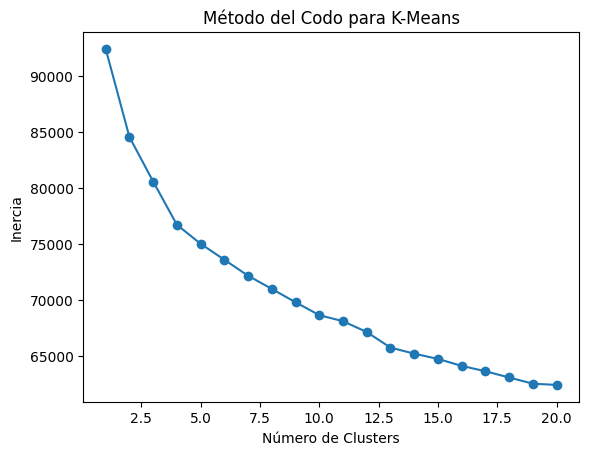

In [9]:
optimal_k = calculate_optimal_k(wcss, k_range)
print(f"El valor óptimo de K es {optimal_k}")

# Graficar la curva del codo
plt.plot(k_range, wcss, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [10]:
kmeans_ll = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters_ll = kmeans_ll.fit_predict(vectors_llibres)
llibres_pkl['cluster'] = clusters_ll

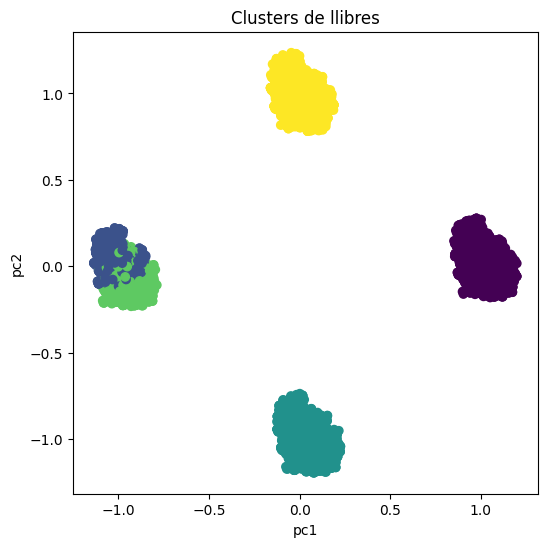

In [22]:
# View the cluster assignments with a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(vectors_llibres)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
principalDf['cluster'] = clusters_ll

# Plot the clusters
plt.figure(figsize=(6, 6))
plt.title('Clusters de llibres')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=principalDf['cluster'], cmap='viridis')
plt.show()

In [20]:
principalDf.head()

,pc1,pc2,cluster
0,1.094862,0.011433,0
1,1.101435,-0.048618,0
2,-0.934586,-0.014721,1
3,0.096525,-1.094968,2
4,-1.057053,-0.070526,3


In [12]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters=kmeans.fit(vectors)

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
'''data_dict = {atributo: [] for atributo in dir(casos_pkl[0]) if not callable(getattr(casos_pkl[0], atributo)) and not atributo.startswith("__")}

for instancia in casos_pkl:
    for atributo, valor in instancia.__dict__.items():
        data_dict[atributo].append(valor)

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data_dict)
df['cluster']=clusters.labels_'''

In [13]:
casos_pkl['cluster']=clusters.labels_

In [2]:
import pickle

In [14]:
with open('model_clustering_kmeans.pkl', 'wb') as archivo:
    pickle.dump(kmeans, archivo)

In [12]:
with open('model_clustering_llibres.pkl', 'wb') as archivo:
    pickle.dump(kmeans_ll, archivo)
llibres_pkl.to_pickle('../llibres.pkl')
llibres_pkl.to_csv('../llibres.csv')

In [15]:
casos_pkl.to_pickle('casos_cluster.pkl')